### 1.数据预处理

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:\\Py_dataset\\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
#缩写的列名称改为完整的列名称

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar',  'resting_ele', 
              'maximum_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

In [9]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ele,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


将以数字来区别的类别值转化为字符型

In [11]:
sex_map = {0:'female',1:'male'}
df['sex'] = df['sex'].map(sex_map)


chest_pain_type_map = {0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'}
df['chest_pain_type'] = df['chest_pain_type'].map(chest_pain_type_map)

fasting_blood_sugar_map = {0:'lower than 120',1:'higher than 120'}
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map(fasting_blood_sugar_map)

resting_ele_map = {0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'}
df['resting_ele'] = df['resting_ele'].map(resting_ele_map)

exercise_induced_angina_map = {1:'yes',0:'no'}
df['exercise_induced_angina'] = df['exercise_induced_angina'].map(exercise_induced_angina_map)

st_slope_map = {0:'upsloping',1:'flat',2:'downsloping'}
df['st_slope'] = df['st_slope'].map(st_slope_map)

thalassemia_map = {0:'unkonwn',1:'normal',2:'fix defect',3:'reversable defect'}
df['thalassemia'] = df['thalassemia'].map(thalassemia_map)

In [12]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ele,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,higher than 120,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120,having ST-T wave abnormality,187,no,3.5,upsloping,0,fix defect,1
2,41,female,atypical angina,130,204,lower than 120,normal,172,no,1.4,downsloping,0,fix defect,1
3,56,male,atypical angina,120,236,lower than 120,having ST-T wave abnormality,178,no,0.8,downsloping,0,fix defect,1
4,57,female,typical angina,120,354,lower than 120,having ST-T wave abnormality,163,yes,0.6,downsloping,0,fix defect,1


对类别数据做one_hot_encoding编码处理

In [13]:
df = pd.get_dummies(df)

In [14]:
df.head()

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate,st_depression,number_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,resting_ele_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fix defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unkonwn
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [18]:
#将预处理后的数据做保存

df.to_csv('processed_heart.csv',index = False)

### 2.构建随机森林模型

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
#导入预处理后的数据集
processed_df = pd.read_csv('processed_heart.csv')
processed_df.head()

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate,st_depression,number_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,resting_ele_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fix defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unkonwn
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [21]:
#将数据划分为标签和特征

X = processed_df.drop('target',axis = 1)
y = processed_df['target']

#将数据集划分为测试集和训练集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

print('训练特征的大小:',X_train.shape)
print('训练标签的大小:',y_train.shape)
print('测试特征的大小:',X_test.shape)
print('测试标签的大小:',y_test.shape)

训练特征的大小: (212, 26)
训练标签的大小: (212,)
测试特征的大小: (91, 26)
测试标签的大小: (91,)


In [23]:
#建立随机森林模型

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100,max_depth = 5,random_state = 0)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
#将数值型特征转化为字符型

y_train_str = y_train.astype('str')
y_train_str[y_train_str == 0] = 'no disease'
y_train_str[y_train_str == 1] = 'disease'
y_train_str = y_train_str.values

In [30]:
#可视化其中一棵决策树
estimator = RF.estimators_[5]
feature_list = X_train.columns.tolist()


from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_list,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [31]:
import eli5

eli5.show_weights(estimator, feature_names = feature_list)

Using TensorFlow backend.


Weight,Feature
0.2925,resting_blood_pressure
0.1935,exercise_induced_angina_yes
0.1386,st_depression
0.0952,chest_pain_type_non-anginal pain
0.0784,age
0.0755,thalassemia_fix defect
0.0476,chest_pain_type_asymptomatic
0.0237,fasting_blood_sugar_lower than 120
0.0185,sex_female
0.0178,st_slope_flat


In [33]:
#随机森林模型各特征的重要性

importances = RF.feature_importances_

In [34]:
feature_importance_pair = [(feature,importance) for feature,importance in zip(feature_list,importances)]

In [35]:
feature_importance_pair

[('age', 0.0472309607489013),
 ('resting_blood_pressure', 0.04311037432820081),
 ('serum_cholestoral', 0.053307457409919795),
 ('maximum_heart_rate', 0.07588544599145322),
 ('st_depression', 0.08245380123264306),
 ('number_major_vessels', 0.11717169726526028),
 ('sex_female', 0.023652039559227626),
 ('sex_male', 0.02562589044023438),
 ('chest_pain_type_asymptomatic', 0.009502516481308142),
 ('chest_pain_type_atypical angina', 0.004446909620031),
 ('chest_pain_type_non-anginal pain', 0.01526633090416396),
 ('chest_pain_type_typical angina', 0.10243283132382666),
 ('fasting_blood_sugar_higher than 120', 0.005736504652476412),
 ('fasting_blood_sugar_lower than 120', 0.00582089418666057),
 ('resting_ele_having ST-T wave abnormality', 0.007951958110514747),
 ('resting_ele_left ventricular hypertrophy', 0.0017062561024555928),
 ('resting_ele_normal', 0.0066011706824130175),
 ('exercise_induced_angina_no', 0.04409482128435924),
 ('exercise_induced_angina_yes', 0.05631138786702533),
 ('st_slop

In [37]:
feature_importance_pair.sort(key = lambda x:x[1],reverse = True)

In [38]:
feature_importance_pair

[('thalassemia_fix defect', 0.1535917220747818),
 ('number_major_vessels', 0.11717169726526028),
 ('chest_pain_type_typical angina', 0.10243283132382666),
 ('st_depression', 0.08245380123264306),
 ('maximum_heart_rate', 0.07588544599145322),
 ('thalassemia_reversable defect', 0.05981510194403839),
 ('exercise_induced_angina_yes', 0.05631138786702533),
 ('serum_cholestoral', 0.053307457409919795),
 ('age', 0.0472309607489013),
 ('exercise_induced_angina_no', 0.04409482128435924),
 ('resting_blood_pressure', 0.04311037432820081),
 ('st_slope_downsloping', 0.0257729872294437),
 ('sex_male', 0.02562589044023438),
 ('st_slope_flat', 0.024894185001054808),
 ('sex_female', 0.023652039559227626),
 ('chest_pain_type_non-anginal pain', 0.01526633090416396),
 ('chest_pain_type_asymptomatic', 0.009502516481308142),
 ('resting_ele_having ST-T wave abnormality', 0.007951958110514747),
 ('resting_ele_normal', 0.0066011706824130175),
 ('fasting_blood_sugar_lower than 120', 0.00582089418666057),
 ('fas

In [39]:
features = []
for feature in feature_importance_pair:
    features.append(feature[0])

In [40]:
importances = []
for importance in feature_importance_pair:
    importances.append(importance[1])

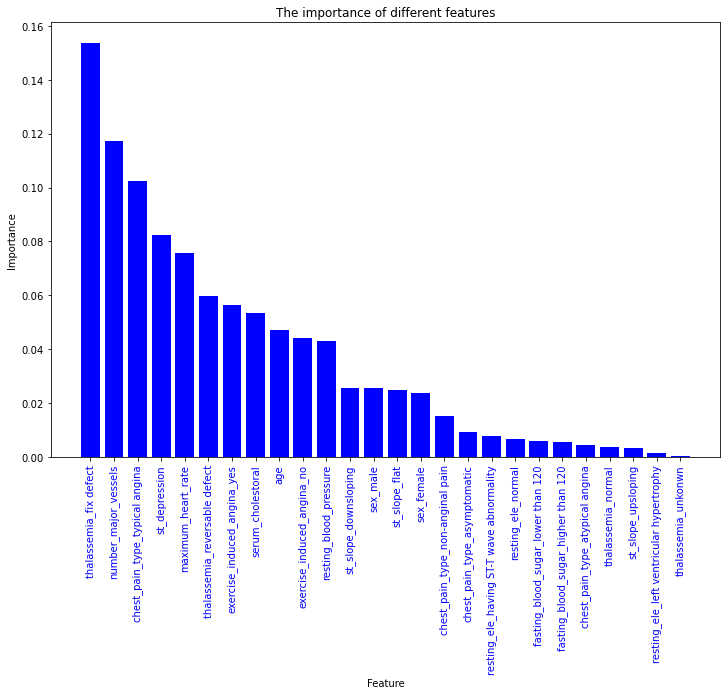

In [46]:
#可视化特征的重要性
plt.figure(figsize = (12,8))
x = range(len(features))
plt.bar(x,importances,color = 'blue')
plt.xlabel('Feature');plt.ylabel('Importance');plt.title('The importance of different features')
plt.xticks(x,features,color = 'b',rotation = 90)
plt.show()